In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FP.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,FP,120,2,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,FP,1100,1,2,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,FP,3500,4,2,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48407 non-null  object        
 1   PARTY_ID      48407 non-null  object        
 2   PARTY_ID_EN   48407 non-null  int64         
 3   PARTY_NAME    48407 non-null  object        
 4   CSL_ID        48407 non-null  object        
 5   ETA_ETD_NO    48407 non-null  int64         
 6   ETD_POL_D     48407 non-null  object        
 7   POD_ID        48299 non-null  object        
 8   POD           48407 non-null  datetime64[ns]
 9   CNTR_ID       48407 non-null  object        
 10  CNTR_SIZE     48407 non-null  object        
 11  CNTR_TYPE     48404 non-null  object        
 12  COST_TERM     48407 non-null  object        
 13  RATE          48407 non-null  int32         
 14  ENCODED_TYPE  48407 non-null  int32         
 15  ENCODED_TERM  48407 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [30]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [31]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int64         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int64         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  object        
 11  CNTR_TYPE     48296 non-null  object        
 12  COST_TERM     48296 non-null  object        
 13  RATE          48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  ENCODED_TERM  48296 non-null  int64 

<h3>Casting All to INT32 or INT64 Type</h3>

In [32]:
df_clean['CNTR_SIZE'] = df_clean['CNTR_SIZE'].astype(np.int32)
df_clean['RATE'] = df_clean['RATE'].astype(np.int32)
df_clean['PARTY_ID_EN'] = df_clean['PARTY_ID_EN'].astype(np.int32)
df_clean['POD_ID_EN'] = df_clean['POD_ID_EN'].astype(np.int64)
df_clean['ETA_ETD_NO'] = df_clean['ETA_ETD_NO'].astype(np.int32)
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int32         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int32         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  int32         
 11  CNTR_TYPE     48296 non-null  object        
 12  COST_TERM     48296 non-null  object        
 13  RATE          48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  ENCODED_TERM  48296 non-null  int64 

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,2432422134
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,912364328
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,FP,120,2,2,855066115
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,FP,1100,1,2,1337392243
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,FP,3500,4,2,2460062351


<h4>Rearrange columns where ID first then label</h4>

In [33]:
sel_col = ['COM_ID','CSL_ID', 'CNTR_ID','ENCODED_TERM','COST_TERM','POD_ID','ETD_POL_D','PARTY_ID',
           'PARTY_ID_EN', 'PARTY_NAME','POD_ID_EN','ETA_ETD_NO','POD',
           'CNTR_SIZE','ENCODED_TYPE','CNTR_TYPE','RATE']

df_fp = df_clean[sel_col]
df_fp.head()
df_fp.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010060200592,CTNR010060300015,2,FP,COLOMBO,LKCMB,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,2432422134,20060303,2006-03-03,40,1,HC,650
1,010,ECS010060200181,CTNR010060300111,2,FP,OSAKA,JPOSA,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,912364328,20060305,2006-03-05,20,2,GP,370
2,010,ECS010060200248,CTNR010060300075,2,FP,SURABAYA,IDSUB,01005114,1005114,KMTC (SINGAPORE) PTE LTD,855066115,20060305,2006-03-05,20,2,GP,120
3,010,ECS010060200262,CTNR010060300081,2,FP,NHAVA SHEVA ( JNPT ),INNSA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,1337392243,20060306,2006-03-06,40,1,HC,1100
4,010,ECS010060100367,CTNR010060200515,2,FP,"MANZANILLO , MEXICO",MXZLO,01004690,1004690,MAERSK SINGAPORE PTE LTD,2460062351,20060221,2006-02-21,40,4,HC NOR,3500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   CSL_ID        48296 non-null  object        
 2   CNTR_ID       48296 non-null  object        
 3   ENCODED_TERM  48296 non-null  int64         
 4   COST_TERM     48296 non-null  object        
 5   POD_ID        48296 non-null  object        
 6   ETD_POL_D     48296 non-null  object        
 7   PARTY_ID      48296 non-null  object        
 8   PARTY_ID_EN   48296 non-null  int32         
 9   PARTY_NAME    48296 non-null  object        
 10  POD_ID_EN     48296 non-null  int64         
 11  ETA_ETD_NO    48296 non-null  int32         
 12  POD           48296 non-null  datetime64[ns]
 13  CNTR_SIZE     48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  CNTR_TYPE     48296 non-null  object

In [34]:
# interpolate missing values
df_fp['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [35]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fp = df_fp.sort_values(by='POD').reset_index(drop=True)
df_fp.head()
df_fp['POD'].dt.year.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,4070
1,010,ECS01050600193,CTNR010050700352,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,518572916,20050715,2005-07-15,20,2,GP,900
2,010,ECS01050600053,CTNR010050700378,2,FP,KEELUNG,TWKEL,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,2562088531,20050715,2005-07-15,20,2,GP,200
3,010,ECS01050600058,CTNR010050700371,2,FP,KAOHSIUNG,TWKHH,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,1952508587,20050715,2005-07-15,20,2,GP,200
4,010,ECS01050700012,CTNR010050700367,2,FP,JAKARTA,IDJKT,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,2909436932,20050715,2005-07-15,40,1,HC,60


array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<p>Removing year 2002 as data before 2005 was used for data testing. Hence, it is not relevant.</p>

In [36]:
# filter out rows where the year is 2002
df_filtered = df_fp[df_fp['POD'].dt.year != 2002]
df_filtered.head()
df_filtered.info()

# Checking if year 2002 is removed
df_filtered['POD'].dt.year.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,4070
1,010,ECS01050600193,CTNR010050700352,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,518572916,20050715,2005-07-15,20,2,GP,900
2,010,ECS01050600053,CTNR010050700378,2,FP,KEELUNG,TWKEL,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,2562088531,20050715,2005-07-15,20,2,GP,200
3,010,ECS01050600058,CTNR010050700371,2,FP,KAOHSIUNG,TWKHH,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,1952508587,20050715,2005-07-15,20,2,GP,200
4,010,ECS01050700012,CTNR010050700367,2,FP,JAKARTA,IDJKT,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,2909436932,20050715,2005-07-15,40,1,HC,60


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   CSL_ID        48296 non-null  object        
 2   CNTR_ID       48296 non-null  object        
 3   ENCODED_TERM  48296 non-null  int64         
 4   COST_TERM     48296 non-null  object        
 5   POD_ID        48296 non-null  object        
 6   ETD_POL_D     48296 non-null  object        
 7   PARTY_ID      48296 non-null  object        
 8   PARTY_ID_EN   48296 non-null  int32         
 9   PARTY_NAME    48296 non-null  object        
 10  POD_ID_EN     48296 non-null  int64         
 11  ETA_ETD_NO    48296 non-null  int32         
 12  POD           48296 non-null  datetime64[ns]
 13  CNTR_SIZE     48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  CNTR_TYPE     48296 non-null  object

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Filtering by most export count, container size, container type and focus in on most used shipping vendor quotations.</h3>

In [37]:
# View which is the most popular port using numpy
port_id, port_count = np.unique(df_filtered["POD_ID"], return_counts=True)
count_sort_ind = np.argsort(-port_count)
print(list(zip(port_id[count_sort_ind], port_count[count_sort_ind])))
print(len(port_id))

[('SHANGHAI', 1914), ('JAKARTA', 1864), ('SANTOS', 1712), ('HONG KONG', 1523), ('BANGKOK', 1423), ('DUBAI (JEBEL ALI)', 1044), ('RIO DE JANEIRO', 1009), ('KEELUNG', 985), ('CHITTAGONG', 979), ('XINGANG', 908), ('BUENOS AIRES', 867), ('PARANAGUA', 756), ('QINGDAO', 754), ('ASHDOD', 741), ('DURBAN', 727), ('MONTEVIDEO', 724), ('COLOMBO', 682), ('VITORIA (BRAZIL)', 649), ('TEMA', 636), ('HAMBURG', 634), ('GOTHENBURG', 623), ('SURABAYA', 619), ('OSLO', 601), ('KAOHSIUNG', 570), ('NAVEGANTES', 559), ('ROTTERDAM', 536), ('LAEM CHABANG', 521), ('HAIPHONG', 512), ('ALEXANDRIA (OLD PORT)', 506), ('DALIAN', 505), ('GENOA', 499), ('HELSINKI', 474), ('ISTANBUL(HAYDARPASA)', 471), ('SUVA', 468), ('DUBLIN', 457), ('BELAWAN', 454), ('RIO GRANDE (BRAZIL)', 448), ('BUSAN', 447), ('YANGON (BSW)', 444), ('NINGBO', 439), ('NHAVA SHEVA ( JNPT )', 439), ('XIAMEN', 438), ('SEMARANG', 430), ('PORT SAID', 415), ('CAT LAI (HO CHI MINH)', 410), ('TOKYO', 406), ('DANANG', 397), ('MADRAS', 392), ('PASIR GUDANG', 3

<p>From the above, SHANGHAI are the biggest export port from Singapore based on FC Cost Term</p>

In [38]:
# Working with Auckland
df_largest_port = df_filtered[df_filtered['POD_ID'] == 'SHANGHAI'].reset_index(drop=True)
df_largest_port.head()
df_largest_port.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600388,CTNR01050700004,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050717,2005-07-17,40,1,HC,420
1,010,ECS010050700184,CTNR010050700652,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050721,2005-07-21,40,1,HC,480
2,010,ECS01050600386,CTNR010050700756,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050724,2005-07-24,40,1,HC,420
3,010,ECS01050600391,CTNR010050700969,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440
4,010,ECS01050600391,CTNR010050700970,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        1914 non-null   object        
 1   CSL_ID        1914 non-null   object        
 2   CNTR_ID       1914 non-null   object        
 3   ENCODED_TERM  1914 non-null   int64         
 4   COST_TERM     1914 non-null   object        
 5   POD_ID        1914 non-null   object        
 6   ETD_POL_D     1914 non-null   object        
 7   PARTY_ID      1914 non-null   object        
 8   PARTY_ID_EN   1914 non-null   int32         
 9   PARTY_NAME    1914 non-null   object        
 10  POD_ID_EN     1914 non-null   int64         
 11  ETA_ETD_NO    1914 non-null   int32         
 12  POD           1914 non-null   datetime64[ns]
 13  CNTR_SIZE     1914 non-null   int32         
 14  ENCODED_TYPE  1914 non-null   int32         
 15  CNTR_TYPE     1914 non-null   object  

In [39]:
# View which is the most popular container size using numpy
port_size, port_size_count = np.unique(df_largest_port["CNTR_SIZE"], return_counts=True)
count_sort_ind = np.argsort(-port_size_count)
print(list(zip(port_size[count_sort_ind], port_size_count[count_sort_ind])))
print(len(port_size))

[(40, 1813), (20, 101)]
2


<p>From the filter above, container exported are mostly size 40 and exported container sizes to Shanghi is only size 40 and size 20.</p>

In [40]:
# Working with container size 40
df_40 = df_largest_port[df_largest_port['CNTR_SIZE'] == 40].reset_index(drop=True)
df_40.head()
df_40.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600388,CTNR01050700004,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050717,2005-07-17,40,1,HC,420
1,010,ECS010050700184,CTNR010050700652,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050721,2005-07-21,40,1,HC,480
2,010,ECS01050600386,CTNR010050700756,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050724,2005-07-24,40,1,HC,420
3,010,ECS01050600391,CTNR010050700969,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440
4,010,ECS01050600391,CTNR010050700970,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        1813 non-null   object        
 1   CSL_ID        1813 non-null   object        
 2   CNTR_ID       1813 non-null   object        
 3   ENCODED_TERM  1813 non-null   int64         
 4   COST_TERM     1813 non-null   object        
 5   POD_ID        1813 non-null   object        
 6   ETD_POL_D     1813 non-null   object        
 7   PARTY_ID      1813 non-null   object        
 8   PARTY_ID_EN   1813 non-null   int32         
 9   PARTY_NAME    1813 non-null   object        
 10  POD_ID_EN     1813 non-null   int64         
 11  ETA_ETD_NO    1813 non-null   int32         
 12  POD           1813 non-null   datetime64[ns]
 13  CNTR_SIZE     1813 non-null   int32         
 14  ENCODED_TYPE  1813 non-null   int32         
 15  CNTR_TYPE     1813 non-null   object  

In [41]:
# View which is the most popular container type using numpy
port_id, port_type_count = np.unique(df_40["CNTR_TYPE"], return_counts=True)
count_sort_ind = np.argsort(-port_type_count)
print(list(zip(port_id[count_sort_ind], port_type_count[count_sort_ind])))
print(len(port_id))

[('HC', 1794), ('GP', 12), ('HC (SOC)', 7)]
3


<p>For the filter above, we can see that for Shanghi, container size 40, consist of container type HC while a few by GP and HC (SOC). HC is has the highest count for container type. </p>

In [42]:
# Working with container type HC
df_hc = df_40[df_40['CNTR_TYPE'] == 'HC'].reset_index(drop=True)
df_hc.head()
df_hc.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600388,CTNR01050700004,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050717,2005-07-17,40,1,HC,420
1,010,ECS010050700184,CTNR010050700652,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050721,2005-07-21,40,1,HC,480
2,010,ECS01050600386,CTNR010050700756,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050724,2005-07-24,40,1,HC,420
3,010,ECS01050600391,CTNR010050700969,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440
4,010,ECS01050600391,CTNR010050700970,2,FP,SHANGHAI,CNSHA,01001118,1001118,CASH-FORWARDER A/C,2239773858,20050730,2005-07-30,40,1,HC,440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        1794 non-null   object        
 1   CSL_ID        1794 non-null   object        
 2   CNTR_ID       1794 non-null   object        
 3   ENCODED_TERM  1794 non-null   int64         
 4   COST_TERM     1794 non-null   object        
 5   POD_ID        1794 non-null   object        
 6   ETD_POL_D     1794 non-null   object        
 7   PARTY_ID      1794 non-null   object        
 8   PARTY_ID_EN   1794 non-null   int32         
 9   PARTY_NAME    1794 non-null   object        
 10  POD_ID_EN     1794 non-null   int64         
 11  ETA_ETD_NO    1794 non-null   int32         
 12  POD           1794 non-null   datetime64[ns]
 13  CNTR_SIZE     1794 non-null   int32         
 14  ENCODED_TYPE  1794 non-null   int32         
 15  CNTR_TYPE     1794 non-null   object  

In [43]:
# View which is the most used shipping vendor using numpy
vendor_id, vendor_count = np.unique(df_hc["PARTY_NAME"], return_counts=True)
count_sort_ind = np.argsort(-vendor_count)
print(list(zip(vendor_id[count_sort_ind], vendor_count[count_sort_ind])))
print(len(vendor_id))

[('KMTC (SINGAPORE) PTE LTD', 561), ('YANG MING (SINGAPORE) PTE. LTD.', 334), ('HMM (SG) PTE. LTD.', 197), ('ORIENT OVERSEAS CONTAINER LINE LTD.', 149), ('RCL FEEDER PTE LTD', 78), ('"K" LINE (SINGAPORE) PTE LTD', 66), ('YANG MING MARINE TRANSPORT CORPORATION', 66), ('WAN HAI INTERNATIONAL PTE LTD', 47), ('MAERSK SINGAPORE PTE LTD', 46), ('STX PAN OCEAN SINGAPORE PTE LTD', 42), ('CASH-FORWARDER A/C', 35), ('HEUNG-A (SINGAPORE) PTE LTD', 28), ('SAMUDERA SHIPPING LINE LTD', 28), ('MOL (SINGAPORE) PTE LTD', 26), ('CMA CGM ASIA SHIPPING PTE. LTD.', 23), ('MISC AGENCIES (SINGAPORE) PTE LTD', 14), ('MISC BHD', 10), ('CHINA SHIPPING (S) AGENCIES PTE LTD', 8), ('SUMMIT SHIPPING LINE PTE LTD', 6), ('PACIFIC INTERNATIONAL LINES (PTE) LTD', 5), ('SATURN SHIP AGENCIES PTE LTD', 5), ('PERMA SHIPPING LINE (S) PTE LTD', 4), ('HANJIN SHIPPING CO. LTD', 4), ('EVERGREEN SHIPPING AGENCY (SINGAPORE) PTE LTD', 4), ('ALPINE SHIPPING PTE LTD', 1), ('COSCO SHIPPING LINES (SINGAPORE) PTE LTD', 1), ('SEALAND MA

In [44]:
# Working with container type HC
df_party = df_hc[df_hc['PARTY_NAME'] == 'KMTC (SINGAPORE) PTE LTD'].reset_index(drop=True)
df_party.head()
df_party.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010050900590,CTNR010050901311,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051004,2005-10-04,40,1,HC,410
1,010,ECS010050900590,CTNR010050901174,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051004,2005-10-04,40,1,HC,410
2,010,ECS010051000158,CTNR010051100450,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051115,2005-11-15,40,1,HC,360
3,010,ECS010051000158,CTNR010051100451,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051115,2005-11-15,40,1,HC,360
4,010,ECS010051200049,CTNR010051200273,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051207,2005-12-07,40,1,HC,360


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        561 non-null    object        
 1   CSL_ID        561 non-null    object        
 2   CNTR_ID       561 non-null    object        
 3   ENCODED_TERM  561 non-null    int64         
 4   COST_TERM     561 non-null    object        
 5   POD_ID        561 non-null    object        
 6   ETD_POL_D     561 non-null    object        
 7   PARTY_ID      561 non-null    object        
 8   PARTY_ID_EN   561 non-null    int32         
 9   PARTY_NAME    561 non-null    object        
 10  POD_ID_EN     561 non-null    int64         
 11  ETA_ETD_NO    561 non-null    int32         
 12  POD           561 non-null    datetime64[ns]
 13  CNTR_SIZE     561 non-null    int32         
 14  ENCODED_TYPE  561 non-null    int32         
 15  CNTR_TYPE     561 non-null    object    

<p>From the filter above we can observe that exports for Shanghi, container size 40 and type HC, the company mostly uses 'KMTC (SINGAPORE) PTE LTD' quotation for all their exports.</p>

<p>After focusing in a party id, we do need to interpolate the dates as the dates are not in series where there are gaps which could be a problem when performing time series models like ARIMA or Prophet. Furthermore, have to use aggregation to fill up the interpolated dates with cost rate either using median or mean.</p>

<p>Hence we need to symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median.</p>

In [45]:
# Checking for negative cost rate before interpolate
for values in df_party['RATE']:
    if values <= 0:
        print(values)

<p>Just a final check if there is any 0 values or negative values</p>

In [46]:
df_party = df_party.sort_values(by='POD').reset_index(drop=True)
df_party.head()
df_party['POD'].dt.day.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010050900590,CTNR010050901311,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051004,2005-10-04,40,1,HC,410
1,010,ECS010050900590,CTNR010050901174,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051004,2005-10-04,40,1,HC,410
2,010,ECS010051000158,CTNR010051100450,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051115,2005-11-15,40,1,HC,360
3,010,ECS010051000158,CTNR010051100451,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051115,2005-11-15,40,1,HC,360
4,010,ECS010051200049,CTNR010051200273,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051207,2005-12-07,40,1,HC,360


array([ 4, 15,  7, 13, 21, 27,  5, 19, 25,  8, 14,  1, 10, 22,  6, 12, 26,
       16, 24, 31, 28, 20, 11, 18, 30,  3,  2, 17,  9, 23, 29],
      dtype=int64)

<p>We are able to drop duplicates by dates beacause the cost rate is the same despite CSL_ID or CNTR_ID is not the same. However, it will not affect anything as these are not the importance features. Therefore we will proceed to remove duplicates.</p>

In [47]:
df_party = df_party.drop_duplicates(subset=['POD']).reset_index(drop=True)
df_party.info()
df_party.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        440 non-null    object        
 1   CSL_ID        440 non-null    object        
 2   CNTR_ID       440 non-null    object        
 3   ENCODED_TERM  440 non-null    int64         
 4   COST_TERM     440 non-null    object        
 5   POD_ID        440 non-null    object        
 6   ETD_POL_D     440 non-null    object        
 7   PARTY_ID      440 non-null    object        
 8   PARTY_ID_EN   440 non-null    int32         
 9   PARTY_NAME    440 non-null    object        
 10  POD_ID_EN     440 non-null    int64         
 11  ETA_ETD_NO    440 non-null    int32         
 12  POD           440 non-null    datetime64[ns]
 13  CNTR_SIZE     440 non-null    int32         
 14  ENCODED_TYPE  440 non-null    int32         
 15  CNTR_TYPE     440 non-null    object    

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010050900590,CTNR010050901311,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051004,2005-10-04,40,1,HC,410
1,010,ECS010051000158,CTNR010051100450,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051115,2005-11-15,40,1,HC,360
2,010,ECS010051200049,CTNR010051200273,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051207,2005-12-07,40,1,HC,360
3,010,ECS010051100229,CTNR010051200368,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051213,2005-12-13,40,1,HC,360
4,010,ECS010051100231,CTNR010051200872,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20051221,2005-12-21,40,1,HC,360


<p>Focusing on 2 main features: Date and cost rate as the focus is to forecast cost rate prices from shipping vendors for the specific export location, container type and size needed for the shipment to be able to aid business decsions such as selecting the cheapest shipping vendor to minimise cost and maximise profits.</p>

In [48]:
col_sel = ['POD','RATE']
df_sel = df_party[col_sel]
df_sel.head()

,POD,RATE
0,2005-10-04,410
1,2005-11-15,360
2,2005-12-07,360
3,2005-12-13,360
4,2005-12-21,360


(array([6.7453274 , 6.58291854, 6.58291854, 6.58291854, 6.58291854,
       6.58291854, 6.43651133, 6.43651133, 6.43651133, 6.43651133,
       6.43651133, 6.43651133, 6.43651133, 6.43651133, 6.43651133,
       6.43651133, 6.43651133, 6.43651133, 6.71443087, 6.51178882,
       6.51178882, 6.51178882, 6.51178882, 6.51178882, 6.51178882,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.71443087,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.71443087,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.71443087,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.71443087,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.71443087,
       6.71443087, 6.71443087, 6.71443087, 6.71443087, 6.77550684,
       6.77550684, 6.77550684, 6.77550684, 6.77550684, 6.77550684,
       6.77550684, 6.77550684, 6.77550684, 6.77550684, 6.77550684,
       7.09187288, 6.8338447 , 6.8338447 , 6.8338447 , 6.8338447 ,
       6.8338447 , 6.35656097, 6.35656097, 6.08161031, 6.0816

(array([[  0.,   0.,   0.,   0.,   0.,   8.,  22., 251.,  59., 100.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.0373329 , 0.7427869 , 1.4482409 , 2.1536949 , 2.8591489 ,
        3.56460289, 4.27005689, 4.97551089, 5.68096489, 6.38641889,
        7.09187288]),
 <a list of 2 BarContainer objects>)

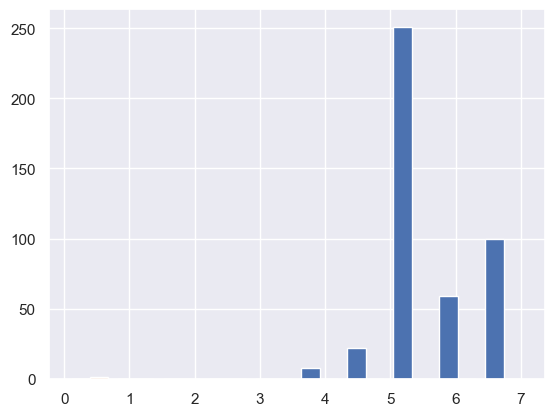

In [49]:
from scipy.stats import boxcox

# Performing symmetric distribution to determine filling up interpolated dates rows with cost rate using mean or median.
lambda_ = boxcox(df_sel['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean as cost rates are too spread out. </p>

<h3>Performing interpolate and aggregation to fill in the missing date entries</h3>

In [50]:
# Set the POD column as the index
df_sel.set_index('POD', inplace=True)

# Interpolate missing dates in the POD column
df_sel = df_sel.resample('D').interpolate(method='time')

# Resample to daily frequency and aggregate RATE using mean
df_sel = df_sel.resample('D').agg({'RATE': 'median'})

# Reset index to have POD as a column again
df_sel = df_sel.reset_index()

# Making Rate as a float in 2dp
df_sel['RATE'] = df_sel['RATE'].round(2).astype(float)

# Print the resulting dataframe
df_sel.head(10)
df_sel.info()


,POD,RATE
0,2005-10-04,410.00
1,2005-10-05,408.81
2,2005-10-06,407.62
3,2005-10-07,406.43
4,2005-10-08,405.24
5,2005-10-09,404.05
6,2005-10-10,402.86
7,2005-10-11,401.67
8,2005-10-12,400.48
9,2005-10-13,399.29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6345 non-null   datetime64[ns]
 1   RATE    6345 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.3 KB


<Figure size 5000x2000 with 0 Axes>

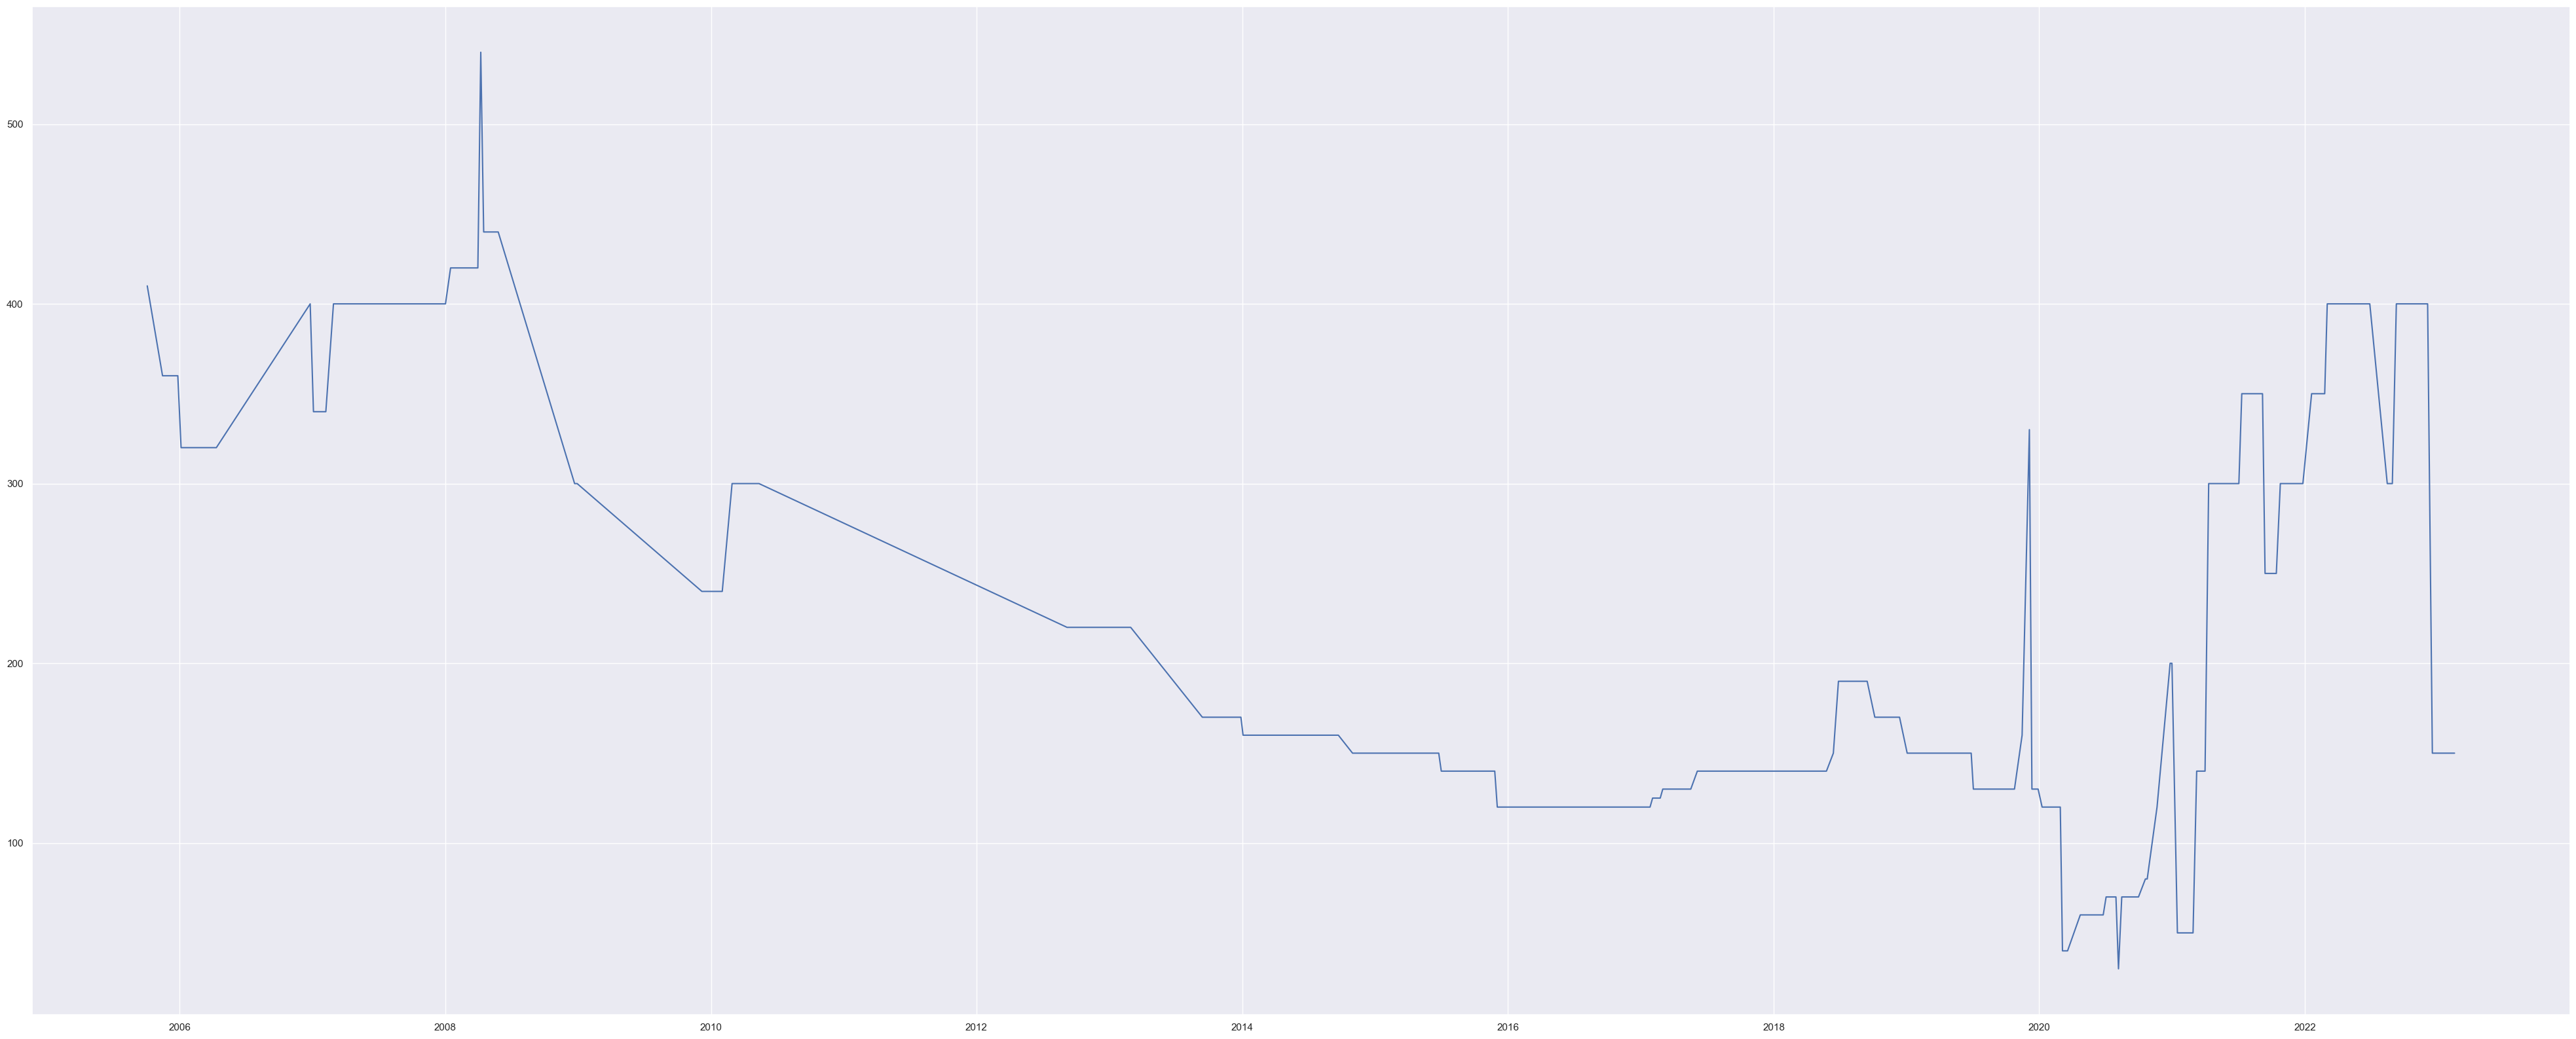

In [51]:
plt.figure(figsize=(50, 20))
plt.plot(df_sel['POD'], df_sel['RATE'])
plt.show()

<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

<Figure size 4000x2000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 4000x2000 with 0 Axes>

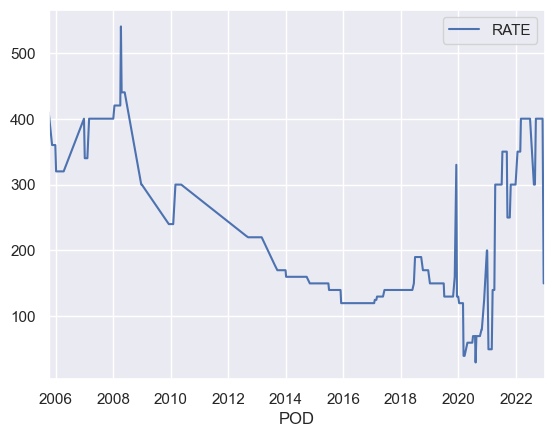

,POD,RATE
0,2005-10-04,410.00
1,2005-10-05,408.81
2,2005-10-06,407.62
3,2005-10-07,406.43
4,2005-10-08,405.24


0      2005-10-04
1      2005-10-05
2      2005-10-06
3      2005-10-07
4      2005-10-08
          ...    
6293   2022-12-27
6294   2022-12-28
6295   2022-12-29
6296   2022-12-30
6297   2022-12-31
Name: POD, Length: 6298, dtype: datetime64[ns]


In [52]:
# Filter out the rows with a date before 2023 for modeling
df_before_2023 = df_sel[df_sel['POD'] < '2023-01-01'].reset_index(drop=True)

# Filtering out rows with date after or equal to 2023 for a reference for accuracy test after the forecast cost rate
df_2023_and_after = df_sel[df_sel['POD'] >= '2023-01-01'].reset_index(drop=True)


plt.figure(figsize=(40, 20))
df_before_2023.plot(x='POD', y='RATE')
plt.show()

df_before_2023.head()
print(df_before_2023['POD'])

<Figure size 6000x3000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x3000 with 0 Axes>

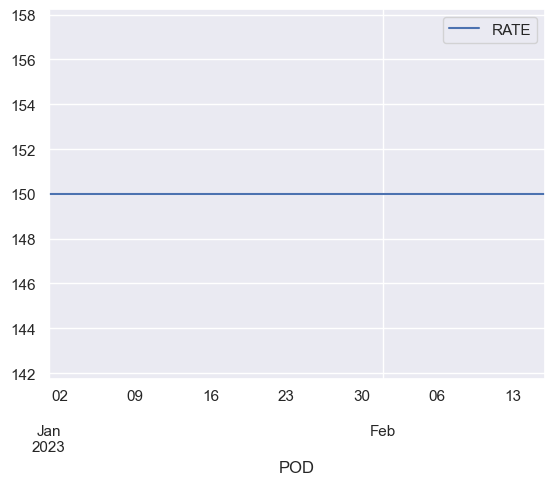

,POD,RATE
0,2023-01-01,150.0
1,2023-01-02,150.0
2,2023-01-03,150.0
3,2023-01-04,150.0
4,2023-01-05,150.0


0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
5    2023-01-06
6    2023-01-07
7    2023-01-08
8    2023-01-09
9    2023-01-10
10   2023-01-11
11   2023-01-12
12   2023-01-13
13   2023-01-14
14   2023-01-15
15   2023-01-16
16   2023-01-17
17   2023-01-18
18   2023-01-19
19   2023-01-20
20   2023-01-21
21   2023-01-22
22   2023-01-23
23   2023-01-24
24   2023-01-25
25   2023-01-26
26   2023-01-27
27   2023-01-28
28   2023-01-29
29   2023-01-30
30   2023-01-31
31   2023-02-01
32   2023-02-02
33   2023-02-03
34   2023-02-04
35   2023-02-05
36   2023-02-06
37   2023-02-07
38   2023-02-08
39   2023-02-09
40   2023-02-10
41   2023-02-11
42   2023-02-12
43   2023-02-13
44   2023-02-14
45   2023-02-15
46   2023-02-16
Name: POD, dtype: datetime64[ns]


In [53]:
plt.figure(figsize=(60, 30))
df_2023_and_after.plot(x='POD', y='RATE')
plt.show()

df_2023_and_after.head()
print(df_2023_and_after['POD'])

<h3>Exporting to filted CSV ready for timeseries and non-timeseries modeling. </h3>

In [54]:
df_before_2023.info()
df_before_2023.to_csv('CR_FP_PREP_0522.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6298 non-null   datetime64[ns]
 1   RATE    6298 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 98.5 KB


In [55]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FP_PREP_23.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     47 non-null     datetime64[ns]
 1   RATE    47 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 880.0 bytes
